## Basisvoorbeelden van Pandas

Dit notebook leidt je door enkele zeer eenvoudige Pandas-concepten. We beginnen met het importeren van de gebruikelijke datawetenschapsbibliotheken:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Series is zoals een lijst of een 1D-array, maar met een index. Alle bewerkingen zijn uitgelijnd op de index.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Een van de veelvoorkomende toepassingen van series is **tijdreeksen**. Bij tijdreeksen heeft de index een speciale structuur - meestal een reeks van datums of datetimen. We kunnen zo'n index maken met `pd.date_range`.

Stel dat we een serie hebben die het aantal producten toont dat elke dag wordt gekocht, en we weten dat we elke zondag ook één item voor onszelf moeten nemen. Hier is hoe we dat kunnen modelleren met behulp van series:


Length of index is 366


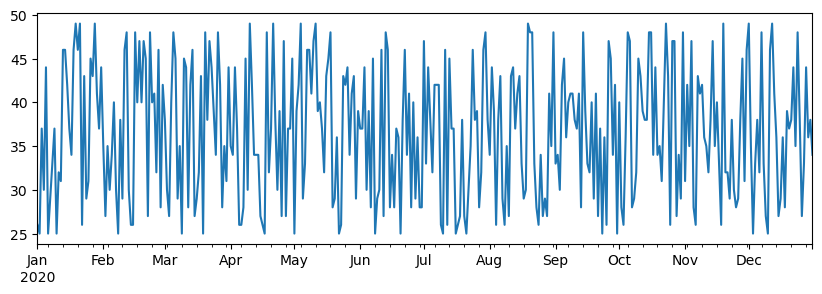

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Zoals je kunt zien, hebben we hier problemen, omdat in de wekelijkse reeks niet-genoemde dagen worden beschouwd als ontbrekend (`NaN`), en het toevoegen van `NaN` aan een getal geeft ons `NaN`. Om het juiste resultaat te krijgen, moeten we `fill_value` specificeren bij het optellen van reeksen:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


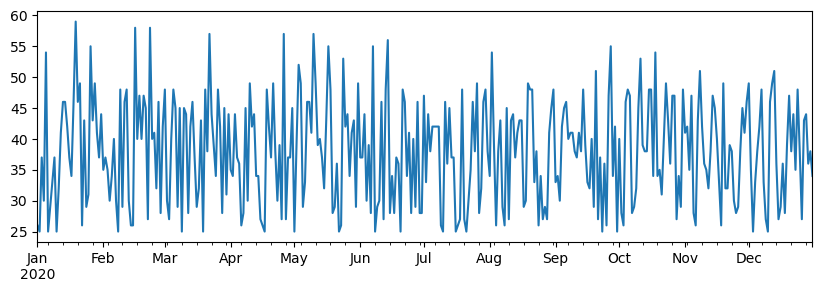

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

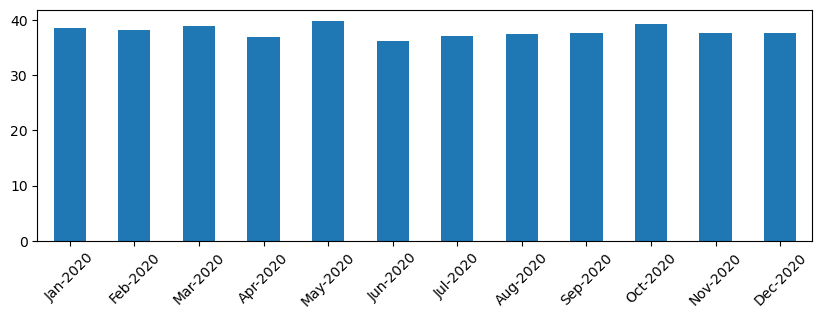

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Een dataframe is in wezen een verzameling van series met dezelfde index. We kunnen meerdere series samenvoegen tot een dataframe. Gegeven de series `a` en `b` die hierboven zijn gedefinieerd:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

We kunnen Series ook als kolommen gebruiken en kolomnamen specificeren met behulp van een woordenboek:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Hetzelfde resultaat kan worden bereikt door te transponeren (en vervolgens kolommen te hernoemen om overeen te komen met het vorige voorbeeld):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Kolommen selecteren** uit een DataFrame kan als volgt worden gedaan:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Rijen selecteren** op basis van filterexpressie:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

De manier waarop het werkt is dat de expressie `df['A']<5` een booleaanse reeks retourneert, die aangeeft of de expressie `True` of `False` is voor elk element van de reeks. Wanneer de reeks als een index wordt gebruikt, retourneert het een subset van rijen in de DataFrame. Het is dus niet mogelijk om willekeurige Python-booleaanse expressies te gebruiken, bijvoorbeeld, het schrijven van `df[df['A']>5 and df['A']<7]` zou verkeerd zijn. In plaats daarvan moet je de speciale `&`-operatie op booleaanse reeksen gebruiken:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Nieuwe berekenbare kolommen maken**. We kunnen eenvoudig nieuwe berekenbare kolommen voor onze DataFrame maken door gebruik te maken van intuïtieve expressies. De onderstaande code berekent de afwijking van A ten opzichte van zijn gemiddelde waarde.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Wat er eigenlijk gebeurt, is dat we een reeks berekenen en deze reeks vervolgens toewijzen aan de linkerzijde, waarmee we een andere kolom creëren.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Rijen selecteren op basis van nummers** kan worden gedaan met behulp van de `iloc` constructie. Bijvoorbeeld, om de eerste 5 rijen van de DataFrame te selecteren:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Groeperen** wordt vaak gebruikt om een resultaat te krijgen dat vergelijkbaar is met *draaitabellen* in Excel. Stel dat we de gemiddelde waarde van kolom `A` willen berekenen voor elk gegeven getal van `LenB`. Dan kunnen we onze DataFrame groeperen op `LenB` en `mean` aanroepen:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Als we het gemiddelde en het aantal elementen in de groep moeten berekenen, dan kunnen we een complexere `aggregate`-functie gebruiken:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Afdrukken en Plotten

Een Data Scientist moet vaak de data verkennen, dus het is belangrijk om deze te kunnen visualiseren. Wanneer een DataFrame groot is, willen we vaak alleen even controleren of we alles correct doen door de eerste paar rijen af te drukken. Dit kan worden gedaan door `df.head()` aan te roepen. Als je dit uitvoert vanuit Jupyter Notebook, wordt de DataFrame in een nette tabelvorm weergegeven.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

We hebben ook het gebruik van de functie `plot` gezien om enkele kolommen te visualiseren. Hoewel `plot` erg handig is voor veel taken en verschillende grafiektypen ondersteunt via de parameter `kind=`, kun je altijd de ruwe bibliotheek `matplotlib` gebruiken om iets complexers te plotten. We zullen datavisualisatie uitgebreid behandelen in aparte cursuslessen.


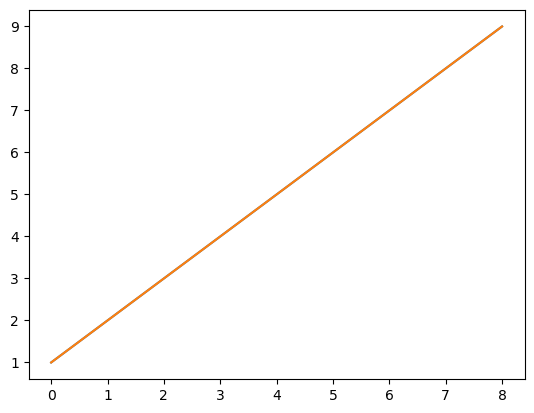

In [61]:
df['A'].plot()
plt.show()

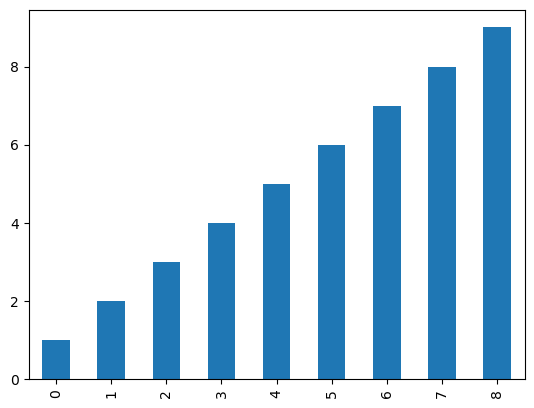

In [63]:
df['A'].plot(kind='bar')
plt.show()

Dit overzicht behandelt de belangrijkste concepten van Pandas, maar de bibliotheek is zeer uitgebreid en de mogelijkheden zijn eindeloos! Laten we deze kennis nu toepassen om een specifiek probleem op te lossen.



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in zijn oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor cruciale informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
